# Exploratory data analysis

In [909]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib import style

plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [910]:
#import data
df = pd.read_csv('Crime_Data_from_2020_to_Present final.csv')

#show first 5 rows
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,LOCATION
0,10304468,1/8/2020 0:00,1/8/2020 0:00,2230,3,Southwest,377,624,BATTERY - SIMPLE ASSAULT,36,F,B,501,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624,NaN,1100 W 39TH PL
1,190101086,1/2/2020 0:00,1/1/2020 0:00,330,1,Central,163,624,BATTERY - SIMPLE ASSAULT,25,M,H,102,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624,NaN,700 S HILL ST
2,200110444,4/14/2020 0:00,2/13/2020 0:00,1200,1,Central,155,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,726,POLICE FACILITY,NaN,NaN,AA,Adult Arrest,845,NaN,200 E 6TH ST
3,191501505,1/1/2020 0:00,1/1/2020 0:00,1730,15,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,502,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,745,998.0,5400 CORTEEN PL
4,191921269,1/1/2020 0:00,1/1/2020 0:00,415,19,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,409,BEAUTY SUPPLY STORE,NaN,NaN,IC,Invest Cont,740,NaN,14400 TITUS ST


<Axes: >

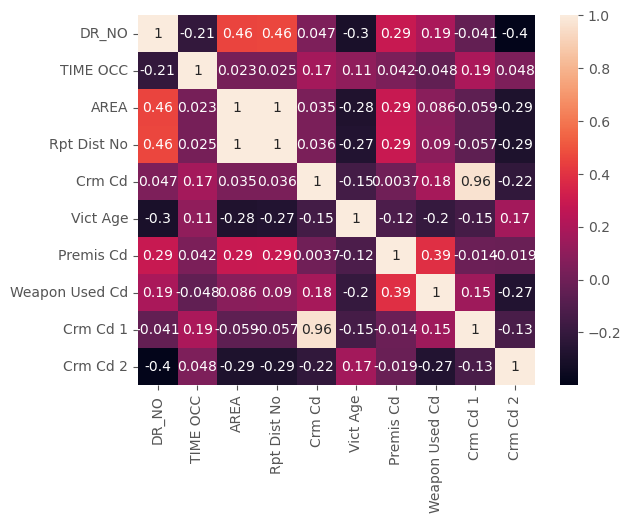

In [911]:
#check correlation - looking between codes and any other variables
sns.heatmap(df.dropna().corr(), annot=True)

In [912]:
# No data dictionary to know colums...first column seems like an index we dont need, so will drop it
df_clean = df.drop(columns="DR_NO", axis=1).copy()
df_clean.head()

,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,LOCATION
0,1/8/2020 0:00,1/8/2020 0:00,2230,3,Southwest,377,624,BATTERY - SIMPLE ASSAULT,36,F,B,501,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624,NaN,1100 W 39TH PL
1,1/2/2020 0:00,1/1/2020 0:00,330,1,Central,163,624,BATTERY - SIMPLE ASSAULT,25,M,H,102,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624,NaN,700 S HILL ST
2,4/14/2020 0:00,2/13/2020 0:00,1200,1,Central,155,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,726,POLICE FACILITY,NaN,NaN,AA,Adult Arrest,845,NaN,200 E 6TH ST
3,1/1/2020 0:00,1/1/2020 0:00,1730,15,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,502,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,745,998.0,5400 CORTEEN PL
4,1/1/2020 0:00,1/1/2020 0:00,415,19,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,409,BEAUTY SUPPLY STORE,NaN,NaN,IC,Invest Cont,740,NaN,14400 TITUS ST


In [913]:
#dataset size
print('observations: ', df_clean.shape[0])
print("Features: ", df_clean.shape[1])

observations:  999
Features:  20


In [914]:
#check data types
df_clean.dtypes

Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Crm Cd              int64
Crm Cd Desc        object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd           int64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1            int64
Crm Cd 2          float64
LOCATION           object
dtype: object

In [915]:
# check column names
print("Dataset column names:", df.columns.values)

Dataset column names: ['DR_NO' 'Date Rptd' 'DATE OCC' 'TIME OCC' 'AREA' 'AREA NAME'
 'Rpt Dist No' 'Crm Cd' 'Crm Cd Desc' 'Vict Age' 'Vict Sex' 'Vict Descent'
 'Premis Cd' 'Premis Desc' 'Weapon Used Cd' 'Weapon Desc' 'Status'
 'Status Desc' 'Crm Cd 1' 'Crm Cd 2' 'LOCATION']


In [916]:
#rename column names to make sense
df_clean = df_clean.rename(columns={"Date Rptd": "Date_Reported", "DATE OCC": "Date_Occured", "TIME OCC": "Time_Occured",
                       "AREA": "Area", "AREA NAME": "Area_Name",             
                       "Crm Cd": "Crime_Code", "Crm Cd Desc": "Crime_Description", "Vict Age": "Victim_Age",
                       "Vict Sex": "Victim_Sex", "Vict Descent": "Victim_Descent", "Premis Cd": "Premis_Code",
                       "Premis Desc": "Premis_Description", "Weapon Used Cd": "Weapon_Code", "Weapon Desc": "Weapon_Description",
                       "Status Desc": "Status_Description", "Crm Cd 1": "Crime_Code1", "Crm Cd 2": "Crime_Code2", "LOCATION": "Location"})

In [917]:
# check column names
print("Dataset column names:", df_clean.columns.values)

Dataset column names: ['Date_Reported' 'Date_Occured' 'Time_Occured' 'Area' 'Area_Name'
 'Rpt Dist No' 'Crime_Code' 'Crime_Description' 'Victim_Age' 'Victim_Sex'
 'Victim_Descent' 'Premis_Code' 'Premis_Description' 'Weapon_Code'
 'Weapon_Description' 'Status' 'Status_Description' 'Crime_Code1'
 'Crime_Code2' 'Location']


In [918]:
#change dates and times to date / time
df_clean[["Date_Reported", "Date_Occured"]] = df_clean[["Date_Reported", "Date_Occured"]].apply(pd.to_datetime)
print(df_clean.dtypes)

Date_Reported         datetime64[ns]
Date_Occured          datetime64[ns]
Time_Occured                   int64
Area                           int64
Area_Name                     object
Rpt Dist No                    int64
Crime_Code                     int64
Crime_Description             object
Victim_Age                     int64
Victim_Sex                    object
Victim_Descent                object
Premis_Code                    int64
Premis_Description            object
Weapon_Code                  float64
Weapon_Description            object
Status                        object
Status_Description            object
Crime_Code1                    int64
Crime_Code2                  float64
Location                      object
dtype: object


In [919]:
#extract month and year Occured
df_clean['Year_Occured'] = pd.DatetimeIndex(df_clean['Date_Occured']).year
df_clean['Month_Occured'] = pd.DatetimeIndex(df_clean['Date_Occured']).month

In [920]:
#check missing values
print(df_clean.shape)
df_clean.isnull().sum().sort_values(ascending = False)

(999, 22)


Crime_Code2           922
Weapon_Description    608
Weapon_Code           608
Victim_Sex             62
Victim_Descent         62
Date_Reported           0
Premis_Description      0
Year_Occured            0
Location                0
Crime_Code1             0
Status_Description      0
Status                  0
Premis_Code             0
Date_Occured            0
Victim_Age              0
Crime_Description       0
Crime_Code              0
Rpt Dist No             0
Area_Name               0
Area                    0
Time_Occured            0
Month_Occured           0
dtype: int64

In [921]:
#missing values %
(round(df_clean.isnull().sum() / df_clean.shape[0] *100,2)).sort_values(ascending=False)

Crime_Code2           92.29
Weapon_Description    60.86
Weapon_Code           60.86
Victim_Sex             6.21
Victim_Descent         6.21
Date_Reported          0.00
Premis_Description     0.00
Year_Occured           0.00
Location               0.00
Crime_Code1            0.00
Status_Description     0.00
Status                 0.00
Premis_Code            0.00
Date_Occured           0.00
Victim_Age             0.00
Crime_Description      0.00
Crime_Code             0.00
Rpt Dist No            0.00
Area_Name              0.00
Area                   0.00
Time_Occured           0.00
Month_Occured          0.00
dtype: float64

In [922]:
#drop columns that are a code or correlated or irrelevant
df_clean = df_clean.drop(["Area", 'Crime_Code', "Premis_Code", "Weapon_Code", "Status"], axis=1)

Rpt Dist No
101      7
105     12
111     48
112      2
118     12
        ..
2014     1
2036     2
2038     1
2054     1
2137     1
Name: Rpt Dist No, Length: 221, dtype: int64


<Axes: >

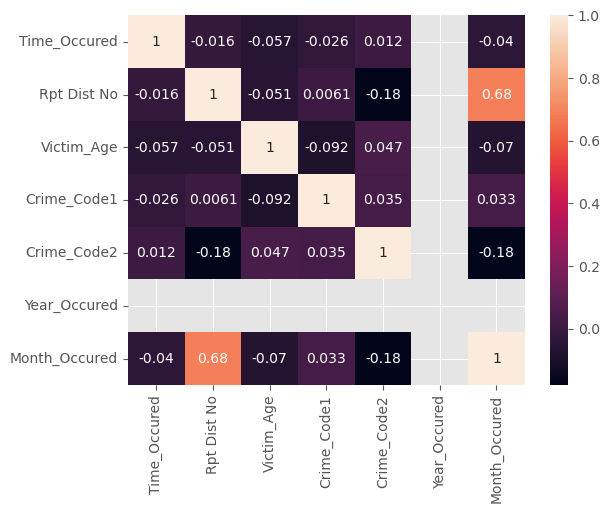

In [923]:
#what is rpt dist no?
print(df_clean.groupby(["Rpt Dist No"])["Rpt Dist No"].count())

#correlation map of Rpt Dist No with all other features - will drop if no correlation
sns.heatmap(df_clean.corr(), annot=True)

# Column "Rept Dist No" seems to be correlated to area...will just remove as with no dictionary, I do not know what it is
# remove crime_code 1 as well as it is the same as crime_code and crime_code2 as it is 92% missing

In [924]:
df_clean = df_clean.drop(["Rpt Dist No", "Crime_Code1", "Crime_Code2"], axis = 1)
df_clean.head()

,Date_Reported,Date_Occured,Time_Occured,Area_Name,Crime_Description,Victim_Age,Victim_Sex,Victim_Descent,Premis_Description,Weapon_Description,Status_Description,Location,Year_Occured,Month_Occured
0,2020-01-08,2020-01-08,2230,Southwest,BATTERY - SIMPLE ASSAULT,36,F,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,1100 W 39TH PL,2020,1
1,2020-01-02,2020-01-01,330,Central,BATTERY - SIMPLE ASSAULT,25,M,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S HILL ST,2020,1
2,2020-04-14,2020-02-13,1200,Central,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,POLICE FACILITY,NaN,Adult Arrest,200 E 6TH ST,2020,2
3,2020-01-01,2020-01-01,1730,N Hollywood,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,Invest Cont,5400 CORTEEN PL,2020,1
4,2020-01-01,2020-01-01,415,Mission,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,BEAUTY SUPPLY STORE,NaN,Invest Cont,14400 TITUS ST,2020,1


Text(0.5, 1.0, 'Triangle Correlation Heatmap')

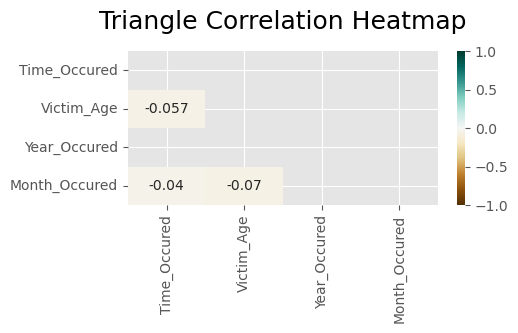

In [925]:
#plot correlation map again without correlated / repeat variables

plt.figure(figsize=(5, 2))

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df_clean.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_clean.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

# No correlations. Will do all grouping and univariate analysis

In [926]:

df_clean['Month'] = df_clean['Month_Occured'].apply(lambda x: "January" if x==1 else "Febuary" if x==2 else "March" if x==3 else 
                                                   "April" if x==4 else "May" if x==5 else "June" if x==6 else "July" if x==7 else
                                                   "August" if x==8 else "September" if x==9 else "October" if x==10 else 'November'
                                                   if x==11 else 'December')
month = pd.DataFrame(df_clean.Month.value_counts())
month.columns = ['Crimes Comitted']
month

,Crimes Comitted
January,795
December,31
November,27
September,24
Febuary,23
March,18
May,16
July,16
October,15
June,15


In [927]:
!pip install dataframe-image
import dataframe_image as dfi

 
dfi.export(month, 'months.png')

In [928]:
df_clean.Year_Occured.value_counts()

2020    999
Name: Year_Occured, dtype: int64

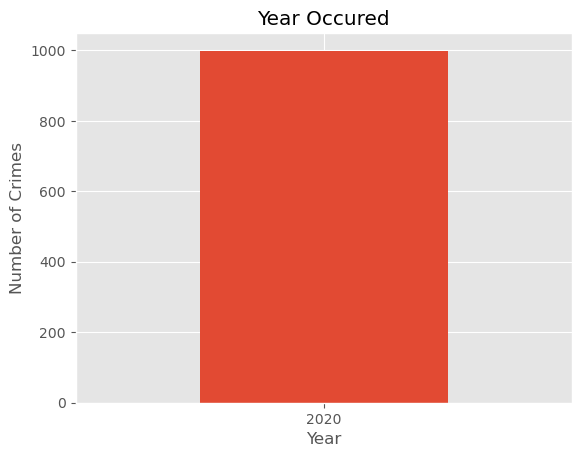

In [929]:
df_clean.Year_Occured.value_counts().iloc[:10].plot(kind='bar', title='Year Occured')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=0)
plt.savefig('years.png')

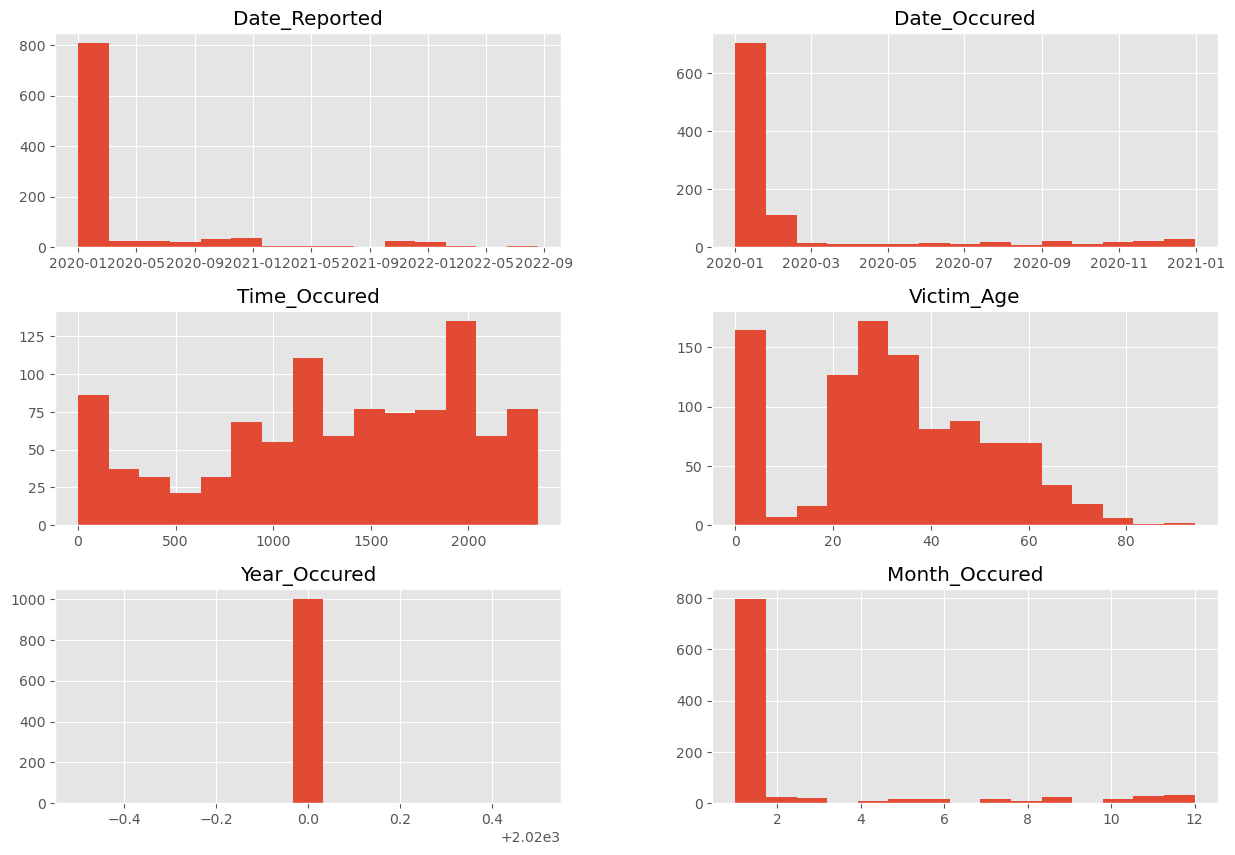

In [930]:
# Histograms are important so we can see the distribuition for each variable and verify the existence of outliers.


# histogram
df_clean.hist(bins=15, figsize=(15,10));

In [931]:
df_clean.describe()

,Time_Occured,Victim_Age,Year_Occured,Month_Occured
count,999.000000,999.000000,999.0,999.000000
mean,1321.817818,32.439439,2020.0,2.326326
std,667.864389,19.753645,0.0,3.048969
min,1.000000,0.000000,2020.0,1.000000
25%,900.000000,23.000000,2020.0,1.000000
50%,1400.000000,32.000000,2020.0,1.000000
75%,1900.000000,46.000000,2020.0,1.000000
max,2355.000000,94.000000,2020.0,12.000000


In [932]:
# no outliers..how could there be in this dataset..

In [933]:
print(df_clean.groupby(['Month_Occured'])['Month_Occured'].count())
print(df_clean.groupby(['Year_Occured'])['Year_Occured'].count())

Month_Occured
1     795
2      23
3      18
4      10
5      16
6      15
7      16
8       9
9      24
10     15
11     27
12     31
Name: Month_Occured, dtype: int64
Year_Occured
2020    999
Name: Year_Occured, dtype: int64


# Dataset is heavily skewed toward jan 2020 (80%?), all in 2020
# time occured and age of victim are random

In [934]:
df_clean.head()

,Date_Reported,Date_Occured,Time_Occured,Area_Name,Crime_Description,Victim_Age,Victim_Sex,Victim_Descent,Premis_Description,Weapon_Description,Status_Description,Location,Year_Occured,Month_Occured,Month
0,2020-01-08,2020-01-08,2230,Southwest,BATTERY - SIMPLE ASSAULT,36,F,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,1100 W 39TH PL,2020,1,January
1,2020-01-02,2020-01-01,330,Central,BATTERY - SIMPLE ASSAULT,25,M,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S HILL ST,2020,1,January
2,2020-04-14,2020-02-13,1200,Central,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,POLICE FACILITY,NaN,Adult Arrest,200 E 6TH ST,2020,2,Febuary
3,2020-01-01,2020-01-01,1730,N Hollywood,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,Invest Cont,5400 CORTEEN PL,2020,1,January
4,2020-01-01,2020-01-01,415,Mission,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,BEAUTY SUPPLY STORE,NaN,Invest Cont,14400 TITUS ST,2020,1,January


In [935]:
#check missing values
print(df_clean.shape)
df_clean.isnull().sum().sort_values(ascending = False)

(999, 15)


Weapon_Description    608
Victim_Sex             62
Victim_Descent         62
Date_Reported           0
Date_Occured            0
Time_Occured            0
Area_Name               0
Crime_Description       0
Victim_Age              0
Premis_Description      0
Status_Description      0
Location                0
Year_Occured            0
Month_Occured           0
Month                   0
dtype: int64

In [936]:
#Weapon description is 60 % missing

In [937]:
#check duplicates
df_clean.loc[df_clean.duplicated()]

,Date_Reported,Date_Occured,Time_Occured,Area_Name,Crime_Description,Victim_Age,Victim_Sex,Victim_Descent,Premis_Description,Weapon_Description,Status_Description,Location,Year_Occured,Month_Occured,Month
67,2020-01-01,2020-01-01,905,Central,BATTERY POLICE (SIMPLE),0,X,X,MTA - RED LINE - PERSHING SQUARE,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,500 S HILL ST,2020,1,January
333,2020-01-11,2020-01-11,40,Central,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",26,M,H,SIDEWALK,KNIFE WITH BLADE 6INCHES OR LESS,Invest Cont,HEWITT,2020,1,January
871,2020-01-26,2020-01-26,125,Central,BATTERY - SIMPLE ASSAULT,23,F,H,NIGHT CLUB (OPEN EVENINGS ONLY),"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,800 W OLYMPIC BL,2020,1,January


In [938]:
def age_groups(series):
    if series < 18:
        return "Under 18"
    elif 18 <= series < 25:
        return "18-24 yrs"
    elif 25 <= series < 45:
        return "25-44 yrs"
    elif 45 <= series < 65:
        return "45-64 yrs"
    elif 65 <= series:
        return "65+ yrs"

df_clean['Victim_Age_Group'] = df_clean['Victim_Age'].apply(age_groups)

print(df_clean['Victim_Age_Group'].value_counts())


25-44 yrs    429
45-64 yrs    230
Under 18     184
18-24 yrs    108
65+ yrs       48
Name: Victim_Age_Group, dtype: int64


In [939]:
df_clean.head()

,Date_Reported,Date_Occured,Time_Occured,Area_Name,Crime_Description,Victim_Age,Victim_Sex,Victim_Descent,Premis_Description,Weapon_Description,Status_Description,Location,Year_Occured,Month_Occured,Month,Victim_Age_Group
0,2020-01-08,2020-01-08,2230,Southwest,BATTERY - SIMPLE ASSAULT,36,F,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,1100 W 39TH PL,2020,1,January,25-44 yrs
1,2020-01-02,2020-01-01,330,Central,BATTERY - SIMPLE ASSAULT,25,M,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S HILL ST,2020,1,January,25-44 yrs
2,2020-04-14,2020-02-13,1200,Central,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,POLICE FACILITY,NaN,Adult Arrest,200 E 6TH ST,2020,2,Febuary,Under 18
3,2020-01-01,2020-01-01,1730,N Hollywood,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,Invest Cont,5400 CORTEEN PL,2020,1,January,65+ yrs
4,2020-01-01,2020-01-01,415,Mission,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,BEAUTY SUPPLY STORE,NaN,Invest Cont,14400 TITUS ST,2020,1,January,25-44 yrs


# Questions

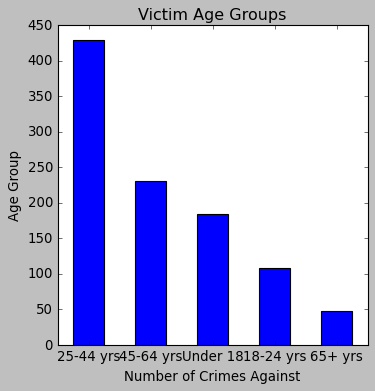

In [1004]:

plt.style.use("classic")#What is the distribution of victim ages?
df_clean.Victim_Age_Group.value_counts(sort='Ascending').plot(figsize=(5,5), kind='bar', title='Victim Age Groups')
plt.xlabel('Number of Crimes Against')
plt.ylabel("Age Group")
plt.xticks(rotation=0)
plt.savefig("age.png")


Text(0, 0.5, 'Count')

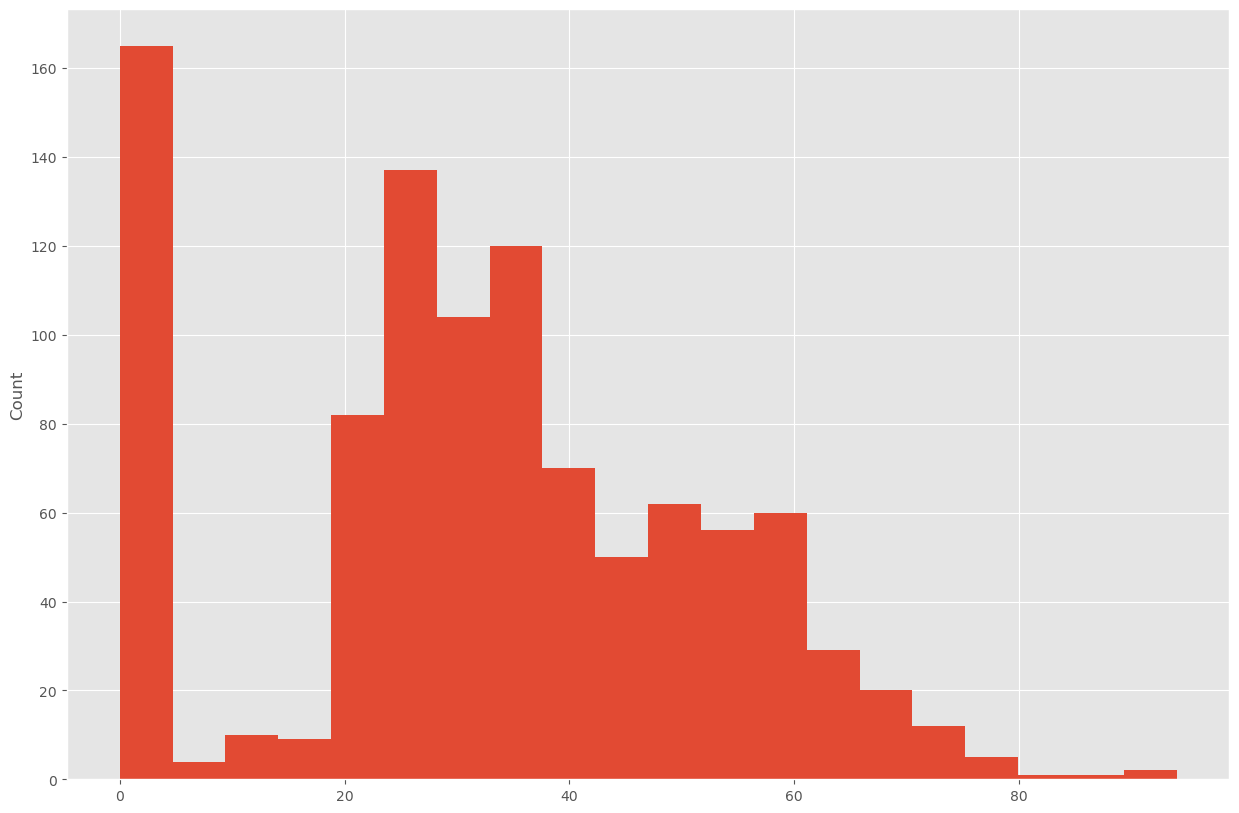

In [941]:
df_clean.Victim_Age.hist(bins=20, figsize=(15,10))
plt.ylabel("Count")

In [942]:
df_clean.Victim_Age.value_counts(sort=False).iloc[:20]

36     17
25     23
0     165
76      3
31     25
23     32
29     26
35     28
41     13
24     22
34     30
46     15
66      4
40     13
27     31
62      9
43     11
71      6
50     18
19     11
Name: Victim_Age, dtype: int64

In [943]:
df_clean.sort_values("Victim_Age").Victim_Age.value_counts(sort=False)

0     165
8       2
9       2
10      1
12      2
13      1
14      6
15      2
16      1
17      2
18      4
19     11
20     10
21     12
22     17
23     32
24     22
25     23
26     31
27     31
28     30
29     26
30     29
31     25
32     24
33     24
34     30
35     28
36     17
37     21
38     30
39     12
40     13
41     13
42      2
43     11
44      9
45     15
46     15
47      7
48     14
49     10
50     18
51     13
52     11
53     11
54      7
55     16
56     11
57     20
58      7
59      8
60     15
61     10
62      9
63      5
64      8
65      7
66      4
67      5
68      5
69      5
70      1
71      6
72      2
73      1
74      2
75      1
76      3
78      1
79      1
81      1
85      1
90      1
94      1
Name: Victim_Age, dtype: int64

# Significant amount of crime to infants age 0

In [944]:
df_clean.loc[df_clean['Victim_Age'] == 0]

,Date_Reported,Date_Occured,Time_Occured,Area_Name,Crime_Description,Victim_Age,Victim_Sex,Victim_Descent,Premis_Description,Weapon_Description,Status_Description,Location,Year_Occured,Month_Occured,Month,Victim_Age_Group
2,2020-04-14,2020-02-13,1200,Central,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,POLICE FACILITY,NaN,Adult Arrest,200 E 6TH ST,2020,2,Febuary,Under 18
7,2020-01-04,2020-01-04,40,Central,OTHER MISCELLANEOUS CRIME,0,X,X,POLICE FACILITY,NaN,Invest Cont,200 E 6TH ST,2020,1,January,Under 18
9,2020-06-19,2020-05-26,1925,Devonshire,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0,X,X,OTHER BUSINESS,NaN,Adult Other,11900 BALBOA BL,2020,5,May,Under 18
13,2020-01-07,2020-01-07,1638,Central,ARSON,0,X,X,DEPARTMENT STORE,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 W 7TH ST,2020,1,January,Under 18
33,2020-09-15,2020-09-03,2000,Central,VEHICLE - STOLEN,0,NaN,NaN,GARAGE/CARPORT,NaN,Invest Cont,500 N FIGUEROA ST,2020,9,September,Under 18
38,2020-01-28,2020-01-28,2100,Central,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0,X,X,STREET,NaN,Invest Cont,11TH ST,2020,1,January,Under 18
40,2020-01-30,2020-01-29,1930,Central,SHOPLIFTING - PETTY THEFT ($950 & UNDER),0,M,W,DEPARTMENT STORE,NaN,Invest Cont,700 W 7TH ST,2020,1,January,Under 18
45,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,STREET,NaN,Invest Cont,13600 MARINA POINT DR,2020,11,November,Under 18
53,2021-04-23,2020-12-01,1200,Central,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,M,O,POLICE FACILITY,NaN,Adult Arrest,200 E 6TH ST,2020,12,December,Under 18
66,2020-01-01,2020-01-01,905,Central,BATTERY POLICE (SIMPLE),0,X,X,MTA - RED LINE - PERSHING SQUARE,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,500 S HILL ST,2020,1,January,Under 18


# What crimeoccured to these infants?

In [945]:
df_infant = df_clean.loc[df_clean['Victim_Age'] == 0]
print(df_infant.Crime_Description.value_counts())

VEHICLE - STOLEN                                            49
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     15
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)             14
SHOPLIFTING - PETTY THEFT ($950 & UNDER)                    13
OTHER MISCELLANEOUS CRIME                                    9
BURGLARY FROM VEHICLE                                        8
BURGLARY                                                     7
TRESPASSING                                                  6
ROBBERY                                                      5
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                     5
SEX OFFENDER REGISTRANT OUT OF COMPLIANCE                    4
BATTERY POLICE (SIMPLE)                                      3
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD     3
DISCHARGE FIREARMS/SHOTS FIRED                               3
THEFT PLAIN - PETTY ($950 & UNDER)                           3
ARSON                                                  

# It seems that the police reports are using age 0 as a placeholder

# Another significant spike at ages 24-36, lets investigate

# Types of crimes commited to 24-36 is random

# What is the distribution by area?

In [946]:
df_clean.Area_Name.value_counts()

Central        795
West LA         21
Hollywood       17
Harbor          17
Hollenbeck      16
Rampart         16
Southwest       14
Northeast       14
Van Nuys        14
West Valley     14
Wilshire        11
Southeast       10
77th Street      9
Pacific          6
Devonshire       6
Foothill         5
Olympic          5
Mission          3
Newton           3
N Hollywood      2
Topanga          1
Name: Area_Name, dtype: int64

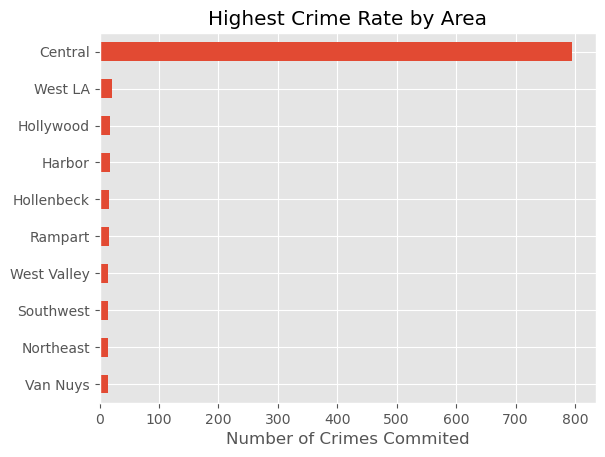

In [1024]:
plt.style.use('ggplot')
df_clean.Area_Name.value_counts().sort_values(ascending=True).tail(10).plot(kind='barh', title='Highest Crime Rate by Area')
plt.xlabel('Number of Crimes Commited')
plt.savefig('areas.png',bbox_inches="tight")


# 80% of the crime in this dataset occured in Central LA, with the remaining 20% split mostly evenly among the other 20 zones

# what is the most prelavent crime type?


In [948]:
df_type = df_clean.Crime_Description.value_counts()
df_type

BURGLARY FROM VEHICLE                                       127
BATTERY - SIMPLE ASSAULT                                    120
THEFT PLAIN - PETTY ($950 & UNDER)                           75
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)      53
SHOPLIFTING - PETTY THEFT ($950 & UNDER)                     50
VEHICLE - STOLEN                                             49
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD     45
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT               43
ROBBERY                                                      35
INTIMATE PARTNER - SIMPLE ASSAULT                            34
THEFT OF IDENTITY                                            33
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                     27
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)              27
BURGLARY                                                     24
CRIMINAL THREATS - NO WEAPON DISPLAYED                       21
BIKE - STOLEN                           

In [949]:
#grouped by sex
df_clean.groupby("Victim_Sex").Crime_Description.value_counts()

Victim_Sex  Crime_Description                                       
F           BATTERY - SIMPLE ASSAULT                                    57
            BURGLARY FROM VEHICLE                                       51
            THEFT PLAIN - PETTY ($950 & UNDER)                          36
            INTIMATE PARTNER - SIMPLE ASSAULT                           24
            BATTERY WITH SEXUAL CONTACT                                 19
            INTIMATE PARTNER - AGGRAVATED ASSAULT                       14
            THEFT OF IDENTITY                                           13
            VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     12
            CRIMINAL THREATS - NO WEAPON DISPLAYED                      10
            SHOPLIFTING - PETTY THEFT ($950 & UNDER)                    10
            THEFT, PERSON                                               10
            THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD    10
            RAPE, FORCIBLE     

# Females and males are both most likely to have burgary from vehicle or simple assault. X could be a placeholder, seems mostly non classifiable or unkown


# No data dictionary but  likely hispanic and white are the top 2 victim descents.

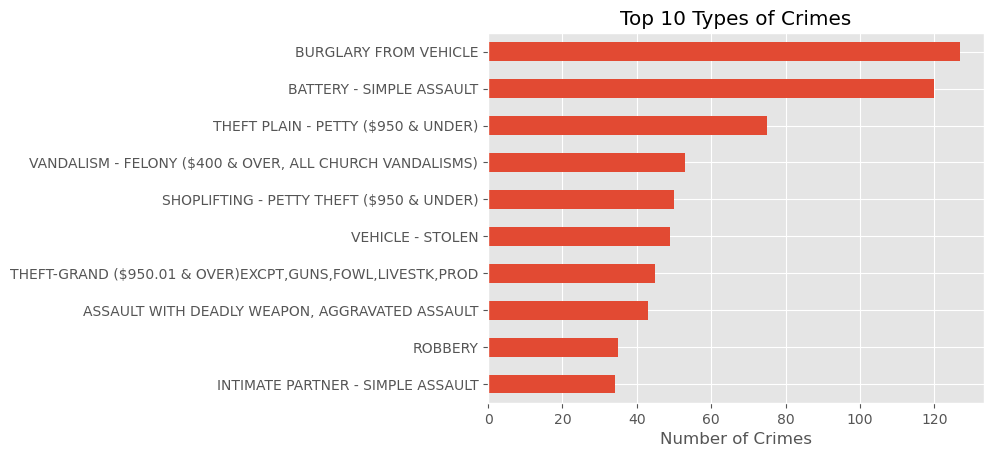

In [1018]:
df_clean.Crime_Description.value_counts().sort_values(ascending=True).tail(10).plot(kind='barh', title='Top 10 Types of Crimes')
plt.xlabel("Number Commited")
plt.xlabel('Number of Crimes')

plt.savefig('types.png', bbox_inches="tight")

# Petty  theft or petty crime or major  theft or assault seems to be the major cause of crime in Jan 2020 in Central LA

In [951]:
#lets see partner assault by victim sex
# df_clean.groupby('Victim_Sex')['Crime_Description'].value_counts()

Partner_Crimes = df_clean[df_clean.Crime_Description.str.contains('INTIMATE PARTNER')]
Partner_Crimes.groupby('Victim_Sex')['Victim_Sex'].count()

Victim_Sex
F    38
M    13
Name: Victim_Sex, dtype: int64

In [952]:
print(38/51, "% of Intimate Partner crimes are against women")

0.7450980392156863 % of Intimate Partner crimes are against women


# Can not determine any trends over time as the dataset is heavily skewed toward Central La in JAN 2020 however hourly trend we can determine

# trend througout the day 

In [953]:
#create column for eaah hour
#df_clean['hour'] = df_clean['Time_Occured'].apply(lambda x: 1 if x < 100 else 2 if 25 <= x < 45 else 3)
df_clean['Hour'] = df_clean['Time_Occured'].apply(lambda x: 0 if x < 100 else 1 if 100 <= x < 200 else 2 if 200 <= x < 300
                                                 else 3 if 300 <= x < 400 else 4 if 400 <= x < 500 else 5 if 500 <= x < 600
                                                 else 6 if 600 <= x < 700 else 7 if 700 <= x < 800 else 8 if 800 <= x < 900
                                                 else 9 if 900 <= x < 1000 else 10 if 1000 <= x < 1100 else 11 if 1100 <= x
                                                 < 1200 else 12 if 1200 <= x < 1300 else 13 if 1300 <= x < 1400 else 14 if 1400
                                                 <= x < 1500 else 15 if 1500 <= x < 1600 else 16 if 1600 <= x < 1700 else 17
                                                 if 1700 <= x < 1800 else 18 if 1800 <= x < 1900 else 19 if 1900 <= x < 2000
                                                 else 20 if 2000 <= x <2100 else 21 if 2100 <= x < 2200 else 22 if 2200 <= x
                                                 < 2300 else 23)

<Axes: title={'center': 'Time of Crime'}>

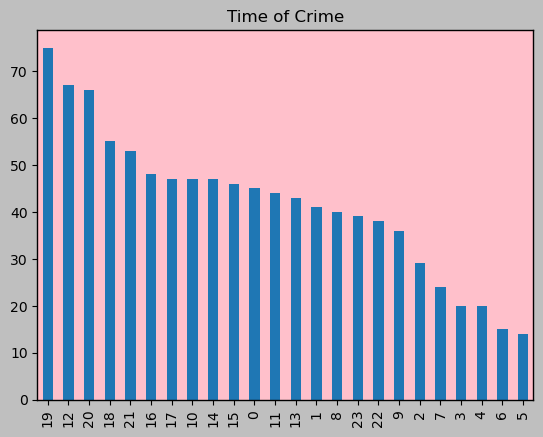

In [1012]:
fig, ax = plt.subplots()
ax.set_facecolor('pink')
plt.style.use('default')
df_clean.Hour.value_counts().plot(kind='bar', title='Time of Crime')


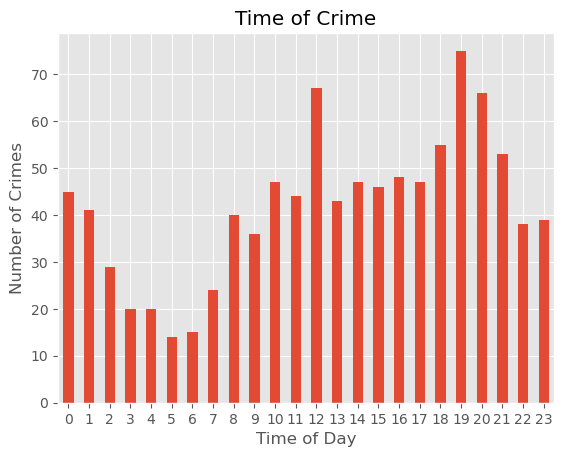

In [955]:
#sort by time of day 
df_clean.groupby("Hour")['Hour'].count().plot(kind='bar', title='Time of Crime')
plt.xlabel('Time of Day')
plt.ylabel("Number of Crimes")
plt.xticks(rotation=0)
plt.savefig("time.png")

<Axes: title={'center': 'Types of crime at noon'}>

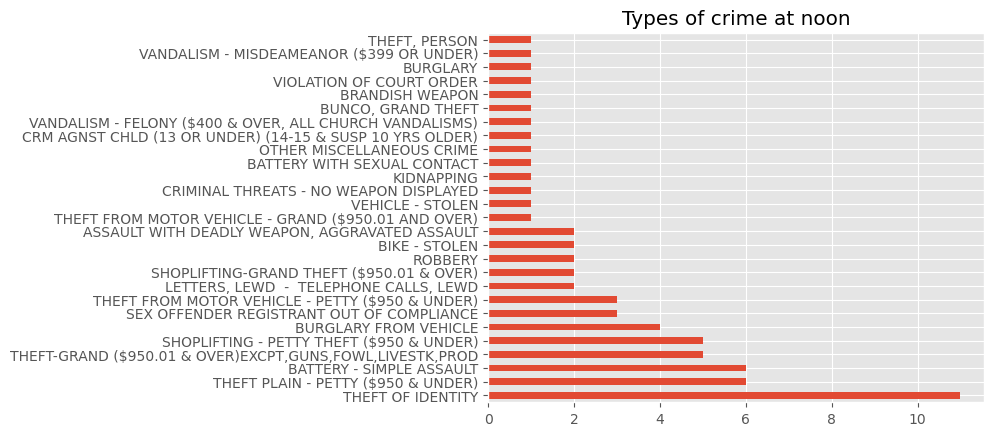

In [956]:
noon = df_clean[df_clean["Hour"] == 12]
noon.Crime_Description.value_counts().plot(kind='barh', title='Types of crime at noon')

# no trend to the type of crime at noon

In [957]:
#% of crimes by hour
round(df_clean.groupby("Hour")['Hour'].count().divide(len(df_clean)) * 100, 2)

Hour
0     4.50
1     4.10
2     2.90
3     2.00
4     2.00
5     1.40
6     1.50
7     2.40
8     4.00
9     3.60
10    4.70
11    4.40
12    6.71
13    4.30
14    4.70
15    4.60
16    4.80
17    4.70
18    5.51
19    7.51
20    6.61
21    5.31
22    3.80
23    3.90
Name: Hour, dtype: float64

# Safest Time of day is 5-6 am , it is high at noon compard to the hours around noon, and also is peaks again at 7-8 pm
# Noon is as dangerous as 8 and almost  as dangerous as 7

# Victim Sex and Descent

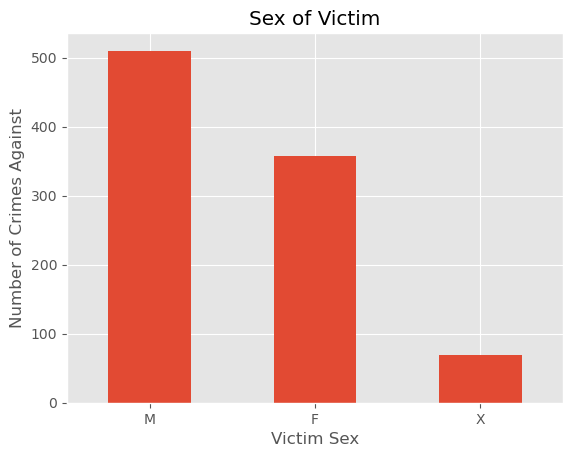

In [975]:
df_clean.Victim_Sex.value_counts().plot(kind='bar', title='Sex of Victim')
plt.xlabel("Victim Sex")
plt.ylabel('Number of Crimes Against')
plt.xticks(rotation=0)
plt.savefig('sex.png')

Victim_Descent
A     45
B    188
C      5
F      4
H    304
I      1
K      4
O     83
W    231
X     72
Name: Victim_Descent, dtype: int64


<Axes: title={'center': 'Victim Descent'}>

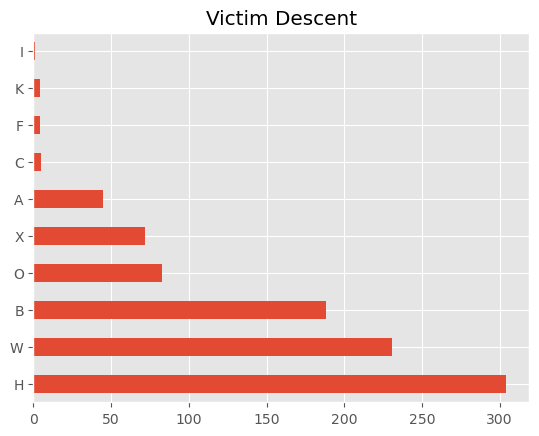

In [959]:
print(df_clean.groupby(["Victim_Descent"])["Victim_Descent"].count())
df_clean.Victim_Descent.value_counts().plot(kind='barh', title='Victim Descent')

# Premis, Status, Weapon

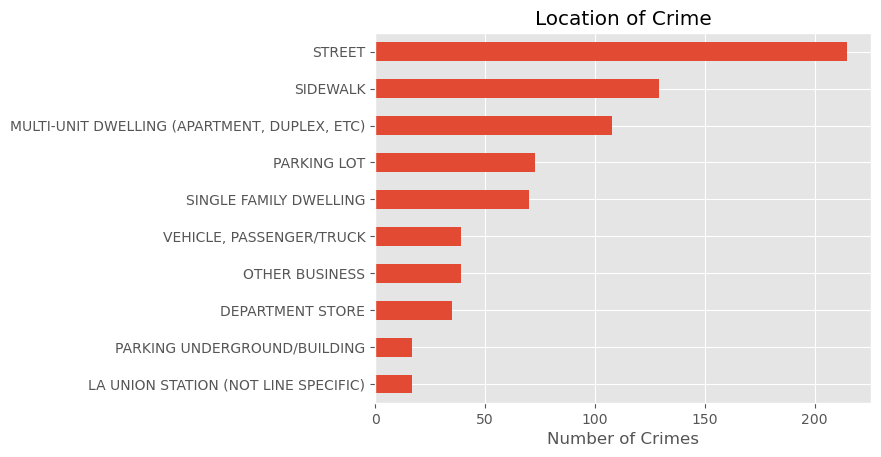

In [1031]:
df_clean.Premis_Description.value_counts().sort_values(ascending=True).tail(10).plot(kind='barh', title='Location of Crime')
plt.xlabel('Number of Crimes')
plt.savefig('location.png', bbox_inches="tight")


# Between parking lot, sidewalk, UG parking  and street, crimes outside account for almost 50 % , inside family dwellings are almost 20 %, busineses / vehicles the rest 

Status_Description
Adult Arrest     80
Adult Other      83
Invest Cont     834
Juv Arrest        2
Name: Status_Description, dtype: int64


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Invest Cont'),
  Text(1, 0, 'Adult Other'),
  Text(2, 0, 'Adult Arrest'),
  Text(3, 0, 'Juv Arrest')])

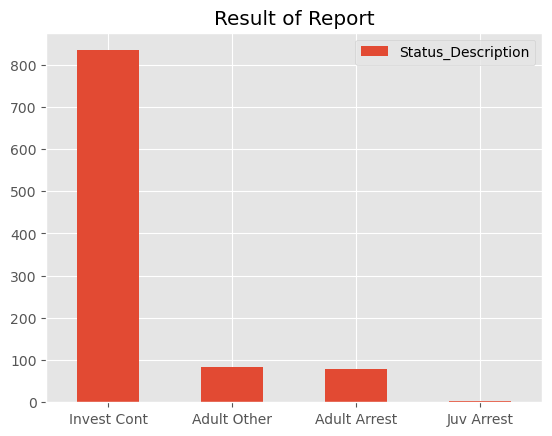

In [979]:
#investigate Status Description values
ax = df1 = pd.DataFrame(df_clean.Status_Description.value_counts())
df1.head().plot(kind='bar', title='Result of Report')
#ax.set_xlabel('Status')
#ax.set_ylabel('Count')
print(df_clean.groupby(['Status_Description'])['Status_Description'].count())
plt.xticks(rotation=0)

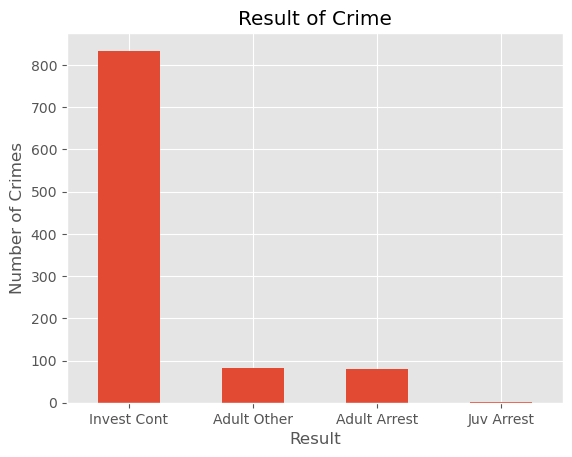

In [985]:
df_clean.Status_Description.value_counts().iloc[:10].plot(kind='bar', title='Result of Crime')
plt.ylabel('Number of Crimes')
plt.xlabel("Result")
plt.xticks(rotation=0)
plt.savefig('location.png', bbox_inches="tight")
plt.savefig('result.png')

In [962]:
#The vast majority of the crimes result in Invesgation Continued - arrestrs are only made in less than 10 % of crimes

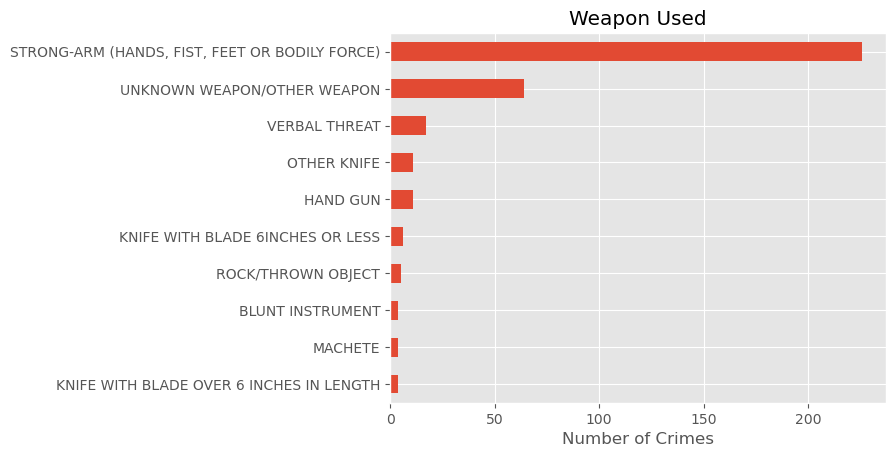

In [1032]:
df_clean.Weapon_Description.value_counts().head(10).sort_values(ascending=True).plot(kind='barh', title='Weapon Used')
plt.xlabel('Number of Crimes')
plt.savefig('weapon.png', bbox_inches="tight")

# 28 % strong arm 6% unknown leaves only 1% gun crimes

In [964]:
df_clean.head()

,Date_Reported,Date_Occured,Time_Occured,Area_Name,Crime_Description,Victim_Age,Victim_Sex,Victim_Descent,Premis_Description,Weapon_Description,Status_Description,Location,Year_Occured,Month_Occured,Month,Victim_Age_Group,Hour
0,2020-01-08,2020-01-08,2230,Southwest,BATTERY - SIMPLE ASSAULT,36,F,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,1100 W 39TH PL,2020,1,January,25-44 yrs,22
1,2020-01-02,2020-01-01,330,Central,BATTERY - SIMPLE ASSAULT,25,M,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S HILL ST,2020,1,January,25-44 yrs,3
2,2020-04-14,2020-02-13,1200,Central,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,POLICE FACILITY,NaN,Adult Arrest,200 E 6TH ST,2020,2,Febuary,Under 18,12
3,2020-01-01,2020-01-01,1730,N Hollywood,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,Invest Cont,5400 CORTEEN PL,2020,1,January,65+ yrs,17
4,2020-01-01,2020-01-01,415,Mission,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,BEAUTY SUPPLY STORE,NaN,Invest Cont,14400 TITUS ST,2020,1,January,25-44 yrs,4


In [965]:
# df.query('Location !+ "Other"') \
#      .groupby('Location')['Speed_mph'] \
#      .agg(['mean'. 'count']) \
#      .query('count > 10') \
#      .sort_values('mean')[mean] \
#      .plot(kind='barh'. figsize=(12, 5), title='Title')

In [966]:
df_clean.to_csv('crime.csv')

In [997]:
#Time to report
(df_clean.Date_Reported - df_clean.Date_Occured).mean()

Timedelta('29 days 10:41:26.486486486')

# geopandas?

In [1033]:
df_clean.Crime_Description.nunique()

64